In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [2]:
# 2. b) Compute Y_m for 1000 different sets of 1000 independent uniform random variables
Y = []
for i in range(0,1000):
    sample = np.random.uniform(0,1,1000)
    sample_f = [x*math.cos(math.pi*x) for x in sample]
    Y.append(np.mean(sample_f))

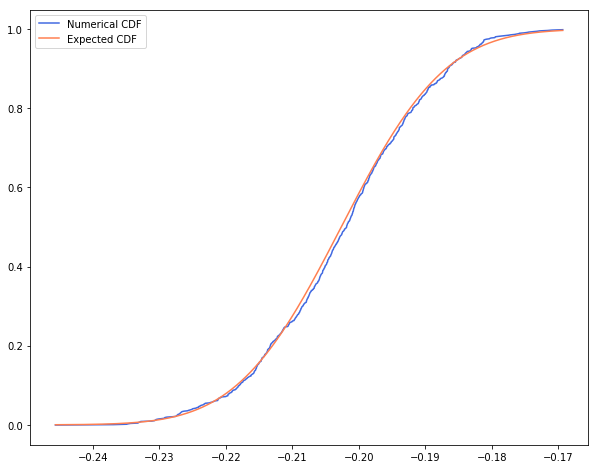

In [32]:
# 2. c) 

# Sort the Y_m into ascending order
Y_sorted = np.sort(Y)

C = [(m-0.5)/1000 for m in range(0,1000)]

# Plot C_m = (m-1/2)/1000 versus Y_m. 
plt.figure(figsize = (10,8))
plt.plot(Y_sorted, C, label = 'Numerical CDF', color = 'royalblue')

# From the CLT we expect that Y_m is approximately N(mu, sqrt(sigma/(1000)) where mu and sigma are as below
mu = -2.0/(math.pi)**2
sigma = math.sqrt((1.0/6.0 + 1.0/(4.0*(math.pi)**2) - 4.0/(math.pi)**4)/(1000.0))

# We superimpose the plot of C_m versus Y_m and the CDF of a N(mu, sigma/1000) random variable
x = np.linspace(Y_sorted[0], Y_sorted[999], 5000)
cdf = scipy.stats.norm.cdf(x,mu,sigma)
plt.plot(x, cdf, label = 'Expected CDF', color = 'coral')
plt.legend()
plt.show()

# Commentary on the results:

In [26]:
# 2. d) Modify your code to use a single set of 10^6 random numbers and plot

sample_mod = np.random.uniform(0,1,10**6)
sample_mod_f = [x*math.cos(x*math.pi) for x in sample_mod]

sum_init = sample_mod_f[0]

Y_mod = [sum_init]

for i in range(0, 10**6):
    sum_init += sample_mod_f[i]
    Y_mod.append(sum_init/float(i+1))


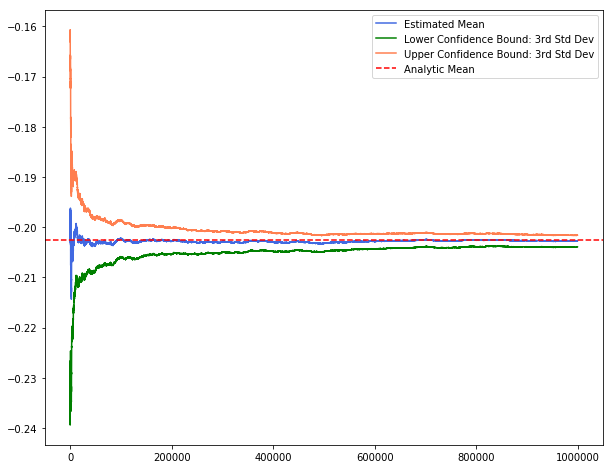

In [35]:
# Calculate the third standard deviation
variance = 1.0/6.0 + 1.0/(4.0*(math.pi)**2) - 4.0/(math.pi)**4
upper_bd = [Y_mod[i] + 3*math.sqrt(variance/float(i+1)) for i in range(0, 10**6)]
lower_bd = [Y_mod[i] - 3*math.sqrt(variance/float(i+1)) for i in range(0, 10**6)]

# Superimpose all previous plots
plt.figure(figsize = (10,8))
plt.plot(Y_mod[10**3:], color = 'royalblue', label = 'Estimated Mean')
plt.plot(lower_bd[10**3:], color = 'g', label = 'Lower Confidence Bound: 3rd Std Dev')
plt.plot(upper_bd[10**3:], color = 'coral', label = 'Upper Confidence Bound: 3rd Std Dev')
plt.axhline(y=-2.0/(math.pi)**2, color='r', linestyle='--', label = 'Analytic Mean')
plt.legend()
plt.show()

